In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

from neurodiffeq_test import diff      # the differentiation operation
from neurodiffeq_test.ode import solve # the ANN-based solver
from neurodiffeq_test.conditions import IVP   # the initial condition

from neurodiffeq_test.monitors import Monitor1D
from neurodiffeq_test.ode import solve_system

from neurodiffeq_test.networks import FCNN    # fully-connect neural network
from neurodiffeq_test.networks import SinActv  #sin activation

from neurodiffeq_test.solvers import Solver1D
from neurodiffeq_test.callbacks import MonitorCallback

from neurodiffeq_test.conditions import DirichletBVP2D
from neurodiffeq_test.solvers import Solver2D
from neurodiffeq_test.monitors import Monitor2D
from neurodiffeq_test.generators import Generator2D
import torch

from neurodiffeq_test.conditions import IBVP1D 
from neurodiffeq_test.pde import make_animation
import pickle
import pandas as pd
import dill
import json 

C:\Users\sakth\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Save Model Code

```python
def save_model(self,file_name,path=pathlib.Path().absolute()):
	PATH = str(path) + "\\" + file_name
	model = self.best_nets[0]
	optimizer = self.optimizer
	for param_tensor in optimizer.state_dict():
		print(param_tensor, "\t", optimizer.state_dict()[param_tensor])
		torch.save(model,PATH)
	return True
```

## Load Model Code

```python
  def load_model(self,PATH):
        model = torch.load(PATH)
        #dict -> subset of internals
        print("Model successfully loaded.")
        return Solution1D([model],self.conditions)
```

# First Order Linear IVP

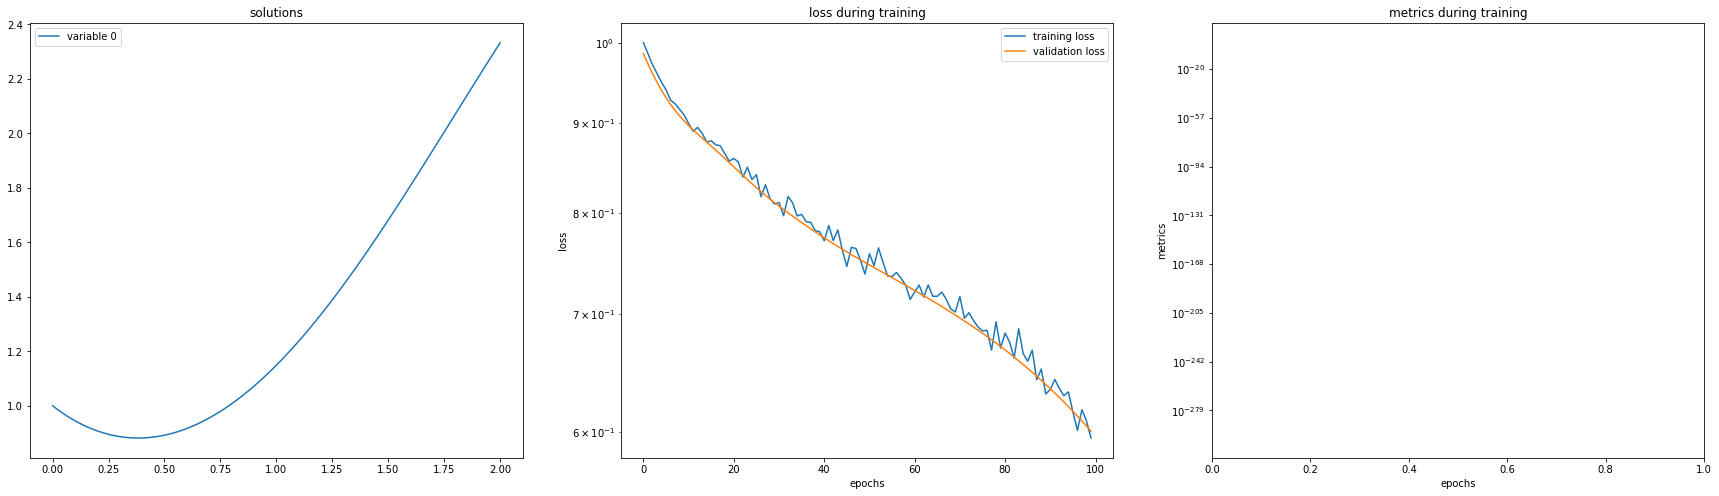

In [2]:
exponential = lambda u, t: [diff(u, t) - u] 
init_val_1 = [IVP(t_0=0.0, u_0=1.0)]     

#Initialize Monitor
monitor = Monitor1D(t_min=0.0, t_max=2.0, check_every=100)

# Turn it into a Callback instance
monitor_callback = MonitorCallback(monitor)

# Instantiate a solver instance
solver = Solver1D(
    ode_system=exponential,
    conditions=init_val_1,
    t_min=0.0,
    t_max=2.0,
)

# Fit the solver (i.e., train the neural networks)
solver.fit(max_epochs=3000, callbacks=[monitor_callback])

# Get the solution
solution_1_trained = solver.get_solution()

In [3]:
#Save Model
solver.save_model("model_1.pt")


#Load Model
solution_1_loaded = solver.load_model(PATH=r'C:\Users\sakth\Desktop\Research\neurodiffeq\model_1.pt')

state 	 {0: {'step': 3000, 'exp_avg': tensor([[ 1.7605e-04],
        [ 3.4455e-04],
        [-8.6294e-05],
        [-2.3812e-04],
        [-5.2551e-04],
        [-3.4176e-04],
        [ 1.0099e-04],
        [ 8.9321e-05],
        [-4.8486e-04],
        [-5.2751e-04],
        [-7.4703e-05],
        [-4.4650e-04],
        [ 6.4446e-04],
        [-7.1030e-04],
        [-5.0670e-04],
        [-7.1236e-04],
        [-2.0101e-05],
        [-1.8229e-04],
        [-1.4343e-04],
        [ 1.1218e-03],
        [-4.6618e-05],
        [-5.3525e-04],
        [ 1.1946e-05],
        [ 8.1163e-05],
        [ 1.2403e-03],
        [ 5.6459e-04],
        [-4.3350e-06],
        [ 5.0146e-05],
        [ 2.1998e-04],
        [ 3.6586e-05],
        [ 7.2837e-05],
        [ 1.0760e-06]]), 'exp_avg_sq': tensor([[5.3922e-06],
        [1.2516e-05],
        [1.0195e-06],
        [8.2554e-06],
        [1.0438e-05],
        [6.9905e-06],
        [5.0270e-07],
        [2.1965e-07],
        [1.1368e-05],
        [2.1

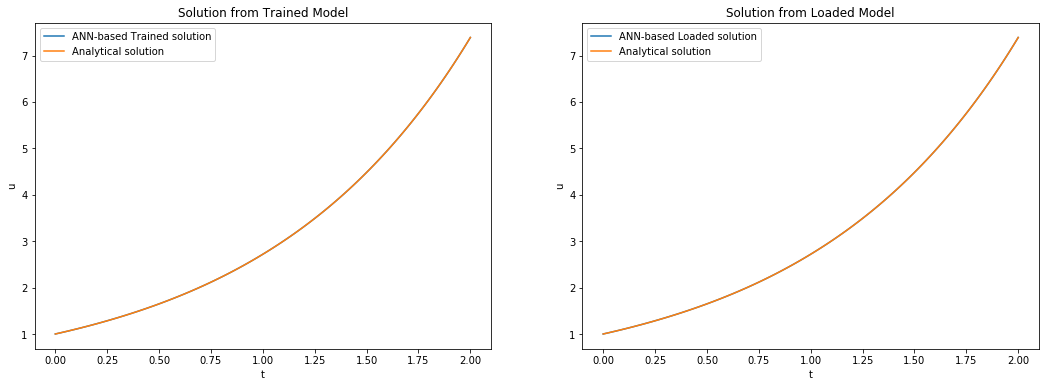

In [4]:
ts = np.linspace(0, 2.0, 100)
u_net_trained = solution_1_trained(ts, to_numpy=True)
u_net_loaded = solution_1_loaded(ts, to_numpy=True)
u_ana = np.exp(ts)

fig,axes = plt.subplots(1,2,figsize=(18,6))
axes[0].plot(ts, u_net_trained, label='ANN-based Trained solution')
axes[0].plot(ts, u_ana, label='Analytical solution')
axes[0].set_ylabel('u')
axes[0].set_xlabel('t')
axes[0].set_title('Solution from Trained Model')
axes[0].legend()


axes[1].plot(ts, u_net_loaded, label='ANN-based Loaded solution')
axes[1].plot(ts, u_ana, label='Analytical solution')
axes[1].set_ylabel('u')
axes[1].set_xlabel('t')
axes[1].set_title('Solution from Loaded Model')
axes[1].legend();

## Harmonic Oscillator

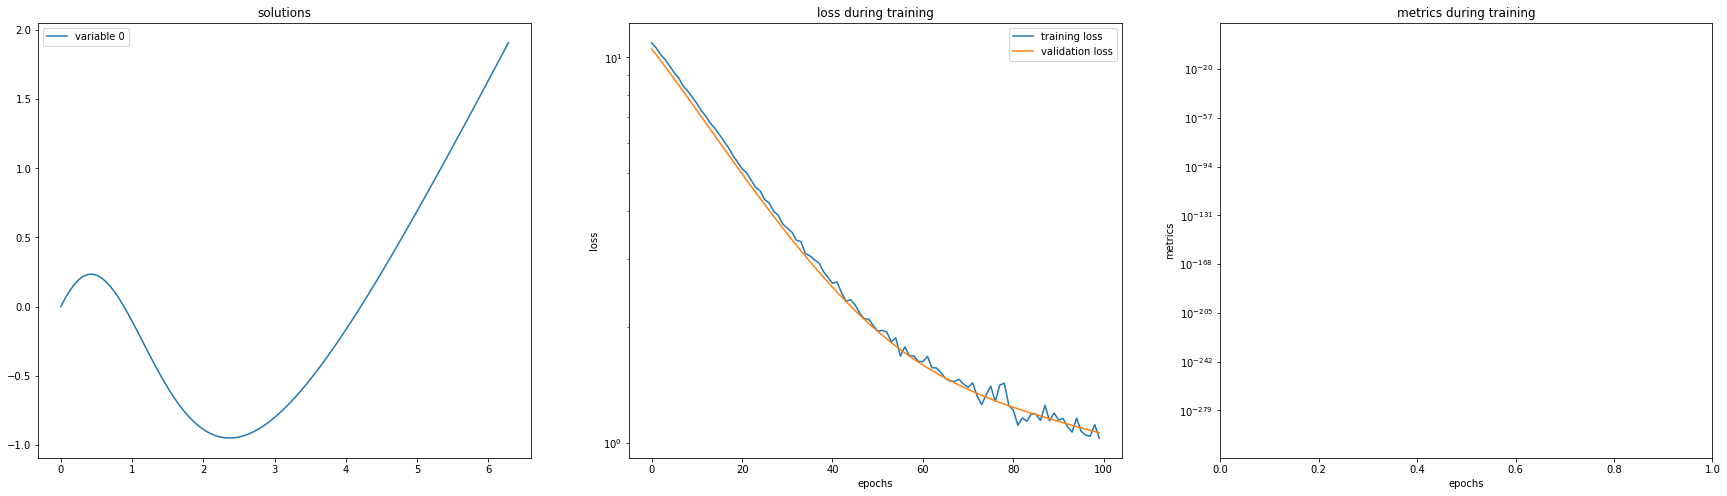

state 	 {0: {'step': 3000, 'exp_avg': tensor([[ 1.5641e-05],
        [-2.9982e-04],
        [-5.0273e-04],
        [-3.3505e-05],
        [-1.6845e-07],
        [-2.9237e-07],
        [-5.9641e-04],
        [ 6.4356e-04],
        [ 9.1323e-04],
        [-1.0685e-03],
        [-8.5676e-06],
        [-1.0298e-03],
        [-2.0048e-04],
        [-7.6661e-06],
        [-5.7695e-04],
        [-4.4212e-05],
        [ 1.2387e-04],
        [-3.2725e-04],
        [ 6.1646e-04],
        [ 3.5742e-06],
        [-5.0650e-04],
        [ 1.4520e-04],
        [-6.7999e-04],
        [-3.8494e-04],
        [-2.3251e-04],
        [-3.6174e-04],
        [ 1.4273e-04],
        [ 1.3658e-04],
        [ 5.2579e-05],
        [-2.3237e-04],
        [-1.4505e-05],
        [-4.8136e-04]]), 'exp_avg_sq': tensor([[1.6572e-07],
        [4.1375e-06],
        [4.8960e-05],
        [2.0718e-05],
        [1.0172e-07],
        [4.6854e-07],
        [6.5473e-05],
        [9.9746e-05],
        [1.6186e-04],
        [2.6

In [5]:
harmonic_oscillator = lambda u, t: [diff(u, t, order=2) + u]
init_val_2 = [IVP(t_0=0.0, u_0=0.0, u_0_prime=1.0)]


#Initialize Monitor
monitor = Monitor1D(t_min=0.0, t_max=2.0*np.pi, check_every=100)

# Turn it into a Callback instance
monitor_callback = MonitorCallback(monitor)

# Instantiate a solver instance
solver = Solver1D(
    ode_system=harmonic_oscillator,
    conditions=init_val_2,
    t_min=0.0,
    t_max=2.0*np.pi,
)

# Fit the solver (i.e., train the neural networks)
solver.fit(max_epochs=3000, callbacks=[monitor_callback])

# Get the solution
solution_2_trained = solver.get_solution()

#Save Model
solver.save_model("model_2.pt")

#Load Model
solution_2_loaded = solver.load_model(PATH=r'C:\Users\sakth\Desktop\Research\neurodiffeq\model_2.pt')

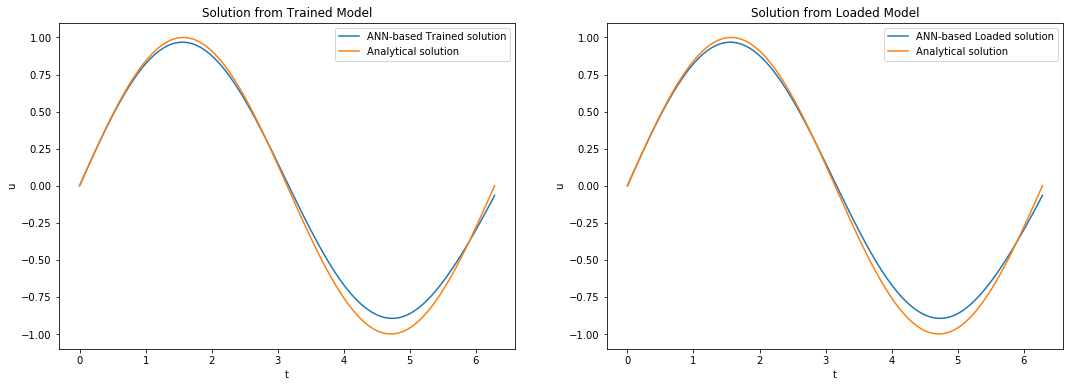

In [6]:
ts = np.linspace(0, 2.0*np.pi, 100)
u_net_trained = solution_2_trained(ts, to_numpy=True)
u_net_loaded = solution_2_loaded(ts, to_numpy=True)
u_ana = np.sin(ts)

fig,axes = plt.subplots(1,2,figsize=(18,6))
axes[0].plot(ts, u_net_trained, label='ANN-based Trained solution')
axes[0].plot(ts, u_ana, label='Analytical solution')
axes[0].set_ylabel('u')
axes[0].set_xlabel('t')
axes[0].set_title('Solution from Trained Model')
axes[0].legend()


axes[1].plot(ts, u_net_loaded, label='ANN-based Loaded solution')
axes[1].plot(ts, u_ana, label='Analytical solution')
axes[1].set_ylabel('u')
axes[1].set_xlabel('t')
axes[1].set_title('Solution from Loaded Model')
axes[1].legend();

## Logistic Equation

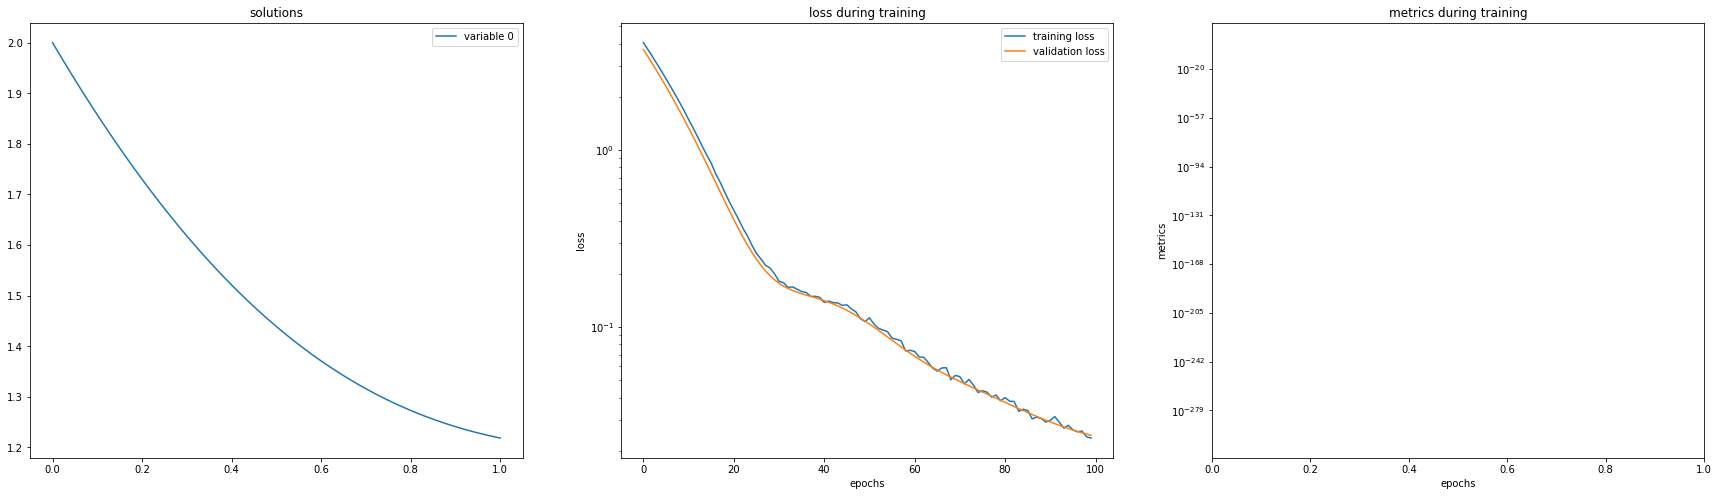

state 	 {0: {'step': 3000, 'exp_avg': tensor([[ 1.2062e-05],
        [ 4.3927e-06],
        [ 1.2997e-05],
        [-8.6921e-06],
        [-1.0750e-04],
        [-1.7266e-05],
        [ 7.8915e-06],
        [ 1.3090e-05],
        [ 3.3555e-06],
        [-7.7097e-06],
        [ 7.1216e-06],
        [ 1.2870e-05],
        [ 8.7756e-06],
        [ 3.8556e-06],
        [ 1.5211e-05],
        [ 6.0356e-06],
        [-2.2475e-05],
        [ 4.2971e-05],
        [-1.0773e-06],
        [-4.9192e-06],
        [ 2.3252e-06],
        [-2.5444e-05],
        [ 1.5031e-05],
        [ 1.8884e-05],
        [-1.2551e-05],
        [-4.2105e-05],
        [ 4.2136e-06],
        [ 1.1490e-06],
        [-3.2524e-05],
        [ 5.3512e-05],
        [ 1.8279e-05],
        [-8.8908e-06]]), 'exp_avg_sq': tensor([[8.0681e-06],
        [3.7641e-05],
        [4.9539e-06],
        [8.6905e-05],
        [5.2247e-06],
        [7.8027e-06],
        [2.6721e-06],
        [4.0926e-05],
        [8.9328e-06],
        [3.6

In [7]:
logistic_equation = lambda u, t: [diff(u, t) - u * (1-u)]
init_val_3= [IVP(t_0=0.0, u_0=2)]

#Initialize Monitor
monitor = Monitor1D(t_min=0.0, t_max=1.0, check_every=100)

# Turn it into a Callback instance
monitor_callback = MonitorCallback(monitor)

# Instantiate a solver instance
solver = Solver1D(
    ode_system=logistic_equation,
    conditions=init_val_3,
    t_min=0.0,
    t_max=1.0,
)

# Fit the solver (i.e., train the neural networks)
solver.fit(max_epochs=3000, callbacks=[monitor_callback])

# Get the solution
solution_3_trained = solver.get_solution()

#Save Model
solver.save_model("model_3.pt")

#Load Model
solution_3_loaded = solver.load_model(PATH=r'C:\Users\sakth\Desktop\Research\neurodiffeq\model_3.pt')

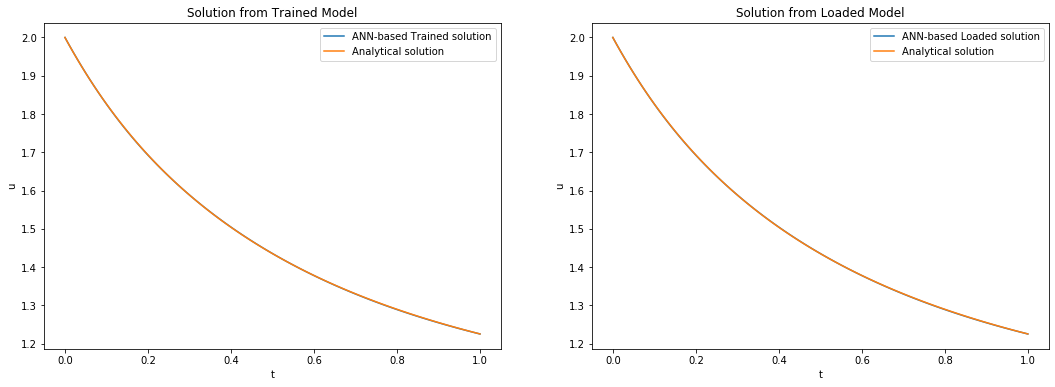

In [8]:
ts = np.linspace(0, 1, 100)
u_net_trained = solution_3_trained(ts, to_numpy=True)
u_net_loaded = solution_3_loaded(ts, to_numpy=True)
u_ana = (2 * np.exp(ts))/(2 * np.exp(ts) - 1)

fig,axes = plt.subplots(1,2,figsize=(18,6))
axes[0].plot(ts, u_net_trained, label='ANN-based Trained solution')
axes[0].plot(ts, u_ana, label='Analytical solution')
axes[0].set_ylabel('u')
axes[0].set_xlabel('t')
axes[0].set_title('Solution from Trained Model')
axes[0].legend()


axes[1].plot(ts, u_net_loaded, label='ANN-based Loaded solution')
axes[1].plot(ts, u_ana, label='Analytical solution')
axes[1].set_ylabel('u')
axes[1].set_xlabel('t')
axes[1].set_title('Solution from Loaded Model')
axes[1].legend();

# Parametric circle 

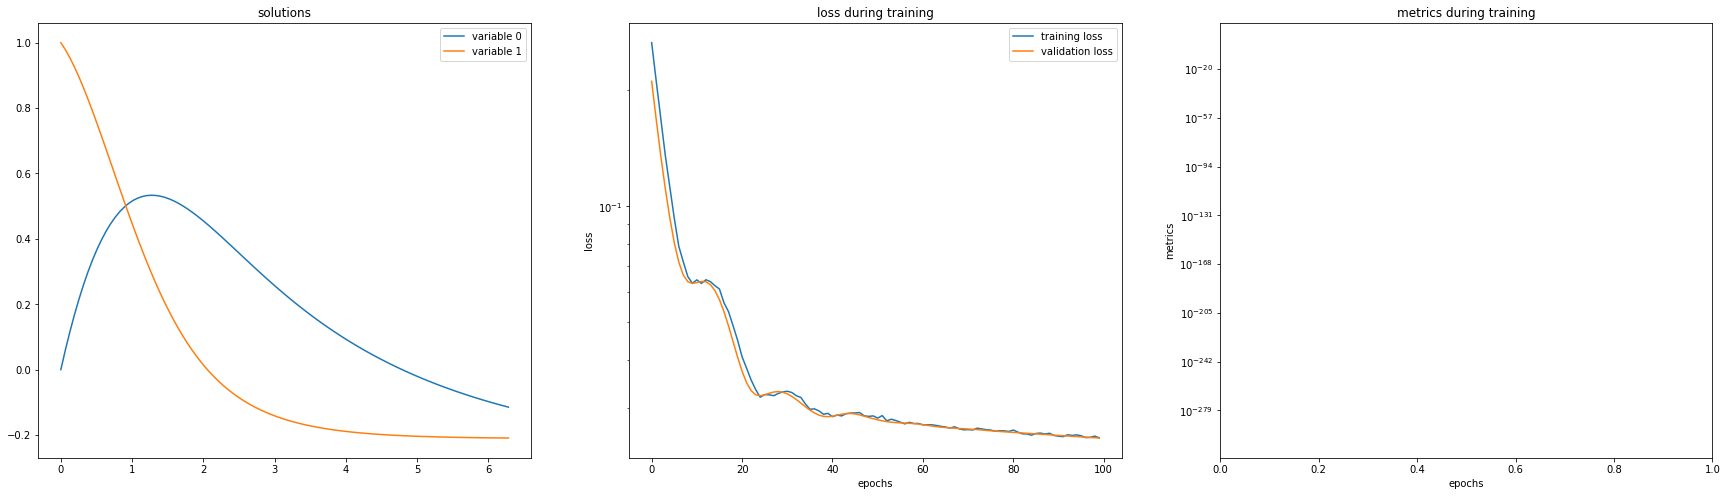

state 	 {0: {'step': 3000, 'exp_avg': tensor([[-2.7821e-04],
        [ 5.4263e-06],
        [-2.6830e-05],
        [-5.1313e-05],
        [-1.9557e-06],
        [ 3.5682e-03],
        [-1.1612e-05],
        [ 7.6183e-06],
        [-1.8918e-04],
        [ 5.0648e-06],
        [ 2.5920e-05],
        [ 3.9060e-08],
        [ 9.0441e-04],
        [-5.2982e-06],
        [ 2.2796e-06],
        [ 2.9562e-03],
        [ 1.4185e-05],
        [-3.7910e-06],
        [ 1.1946e-03],
        [-1.2749e-03],
        [ 1.3082e-06],
        [-4.3511e-04],
        [-5.2833e-04],
        [ 1.1991e-04],
        [ 1.3775e-06],
        [ 5.8085e-04],
        [-7.4502e-04],
        [ 2.3566e-03],
        [ 2.3347e-07],
        [-3.2941e-03],
        [ 4.3866e-04],
        [ 8.3426e-04]]), 'exp_avg_sq': tensor([[9.5675e-06],
        [5.7945e-09],
        [9.3428e-08],
        [2.2959e-07],
        [1.2311e-09],
        [1.1758e-03],
        [1.0398e-08],
        [8.8023e-09],
        [2.8313e-06],
        [1.4

In [9]:
parametric_circle = lambda u1, u2, t : [diff(u1, t) - u2, 
                                        diff(u2, t) + u1]
# specify the initial conditions
init_vals_pc = [
    IVP(t_0=0.0, u_0=0.0),
    IVP(t_0=0.0, u_0=1.0),
]

#Initialize Monitor
monitor = Monitor1D(t_min=0.0, t_max=2*np.pi, check_every=100)

# Turn it into a Callback instance
monitor_callback = MonitorCallback(monitor)

# Instantiate a solver instance
solver = Solver1D(
    ode_system=parametric_circle,
    conditions=init_vals_pc,
    t_min=0.0,
    t_max=2*np.pi,
)

# Fit the solver (i.e., train the neural networks)
solver.fit(max_epochs=3000, callbacks=[monitor_callback])

# Get the solution
solution_4_trained = solver.get_solution()

#Save Model
solver.save_model("model_4.pt")

#Load Model
solution_4_loaded = solver.load_model(PATH=r'C:\Users\sakth\Desktop\Research\neurodiffeq\model_4.pt')

# Partial Differential Equations

In [10]:
from neurodiffeq.conditions import IBVP1D 
from neurodiffeq.pde import make_animation
from neurodiffeq.conditions import DirichletBVP2D
from neurodiffeq.solvers import Solver2D
from neurodiffeq.monitors import Monitor2D
from neurodiffeq.generators import Generator2D
import torch

# Laplace Equation

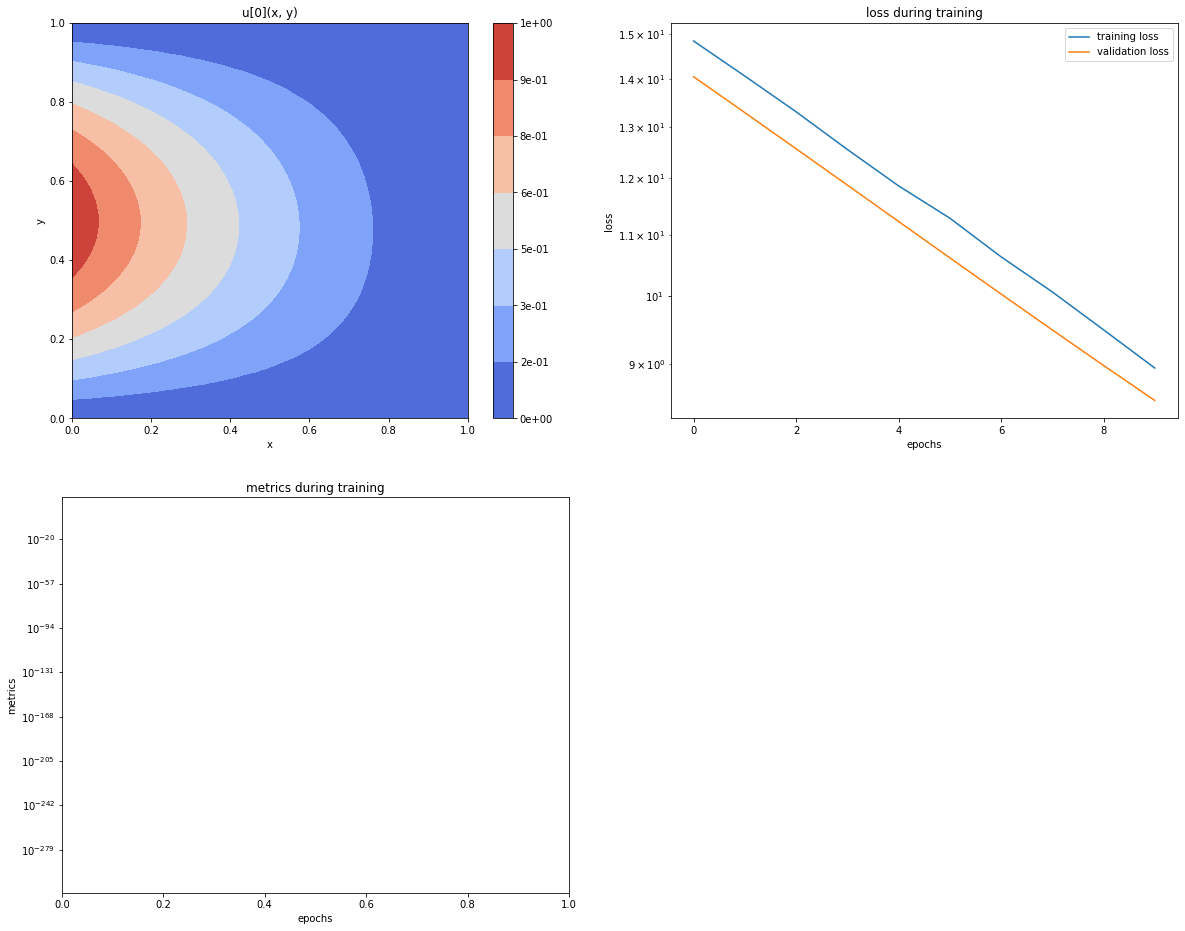

In [11]:
laplace = lambda u, x, y: [
    diff(u, x, order=2) + diff(u, y, order=2)
]


conditions = [
    DirichletBVP2D(
        x_min=0, x_min_val=lambda y: torch.sin(np.pi*y), 
        x_max=1, x_max_val=lambda y: 0, 
        y_min=0, y_min_val=lambda x: 0, 
        y_max=1, y_max_val=lambda x: 0,
    )
]


nets = [
    FCNN(n_input_units=2, n_output_units=1, hidden_units=[512])
]

# Define the monitor callback
monitor=Monitor2D(check_every=10, xy_min=(0, 0), xy_max=(1, 1))
monitor_callback = MonitorCallback(monitor)

# Instantiate the solver 
solver = Solver2D(
    pde_system=laplace,
    conditions=conditions,
    xy_min=(0, 0),  
    xy_max=(1, 1), 
    nets=nets,
    train_generator=Generator2D((32, 32), (0, 0), (1, 1), method='equally-spaced-noisy'),
    valid_generator=Generator2D((32, 32), (0, 0), (1, 1), method='equally-spaced'),
)

# Fit the neural network
solver.fit(max_epochs=200, callbacks=[monitor_callback])

# Obtain the solution
solution_neural_net_laplace = solver.get_solution()

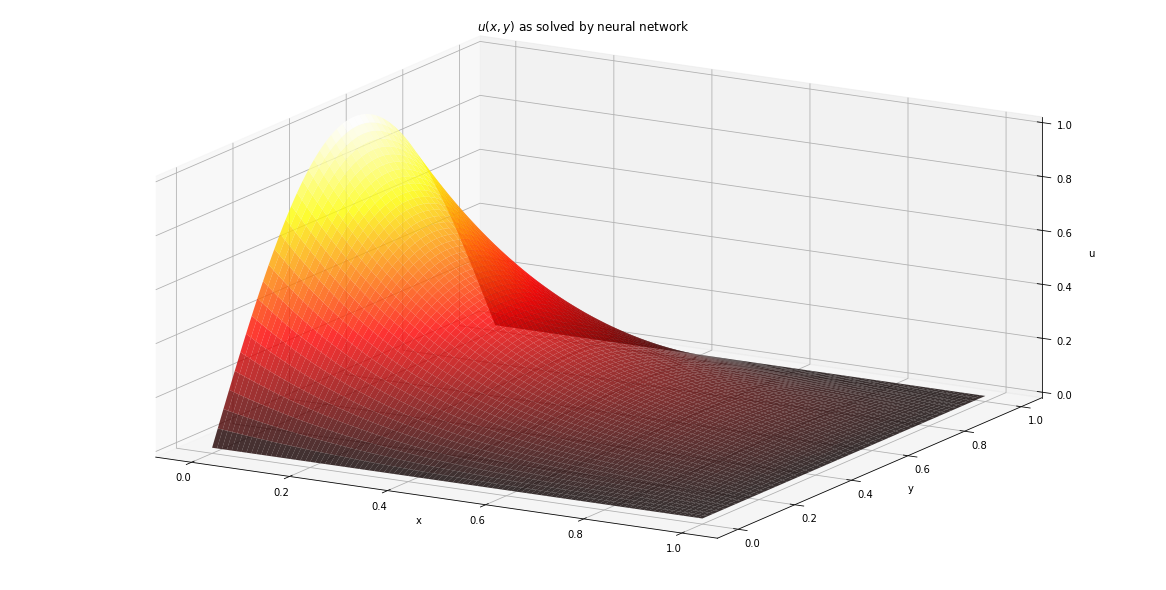

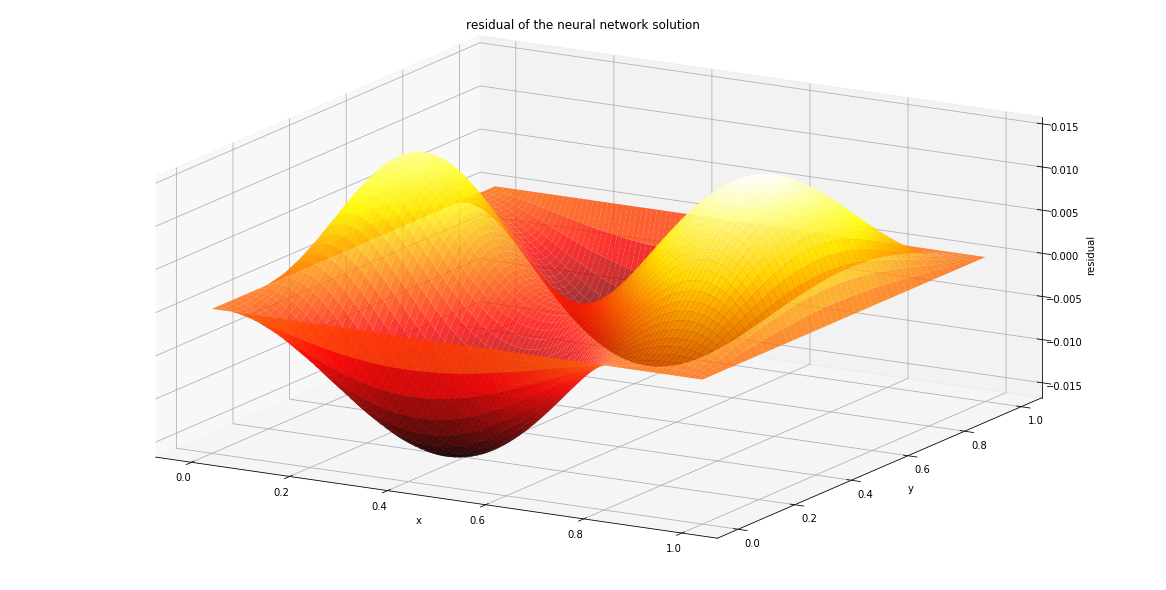

In [12]:
from mpl_toolkits.mplot3d  import Axes3D
def plt_surf(xx, yy, zz, z_label='u', x_label='x', y_label='y', title=''):
    fig  = plt.figure(figsize=(16, 8))
    ax   = Axes3D(fig)
    surf = ax.plot_surface(xx, yy, zz, rstride=2, cstride=1, alpha=0.8, cmap='hot')
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_zlabel(z_label)
    fig.suptitle(title)
    ax.set_proj_type('ortho')
    plt.show()
    
xs, ys = np.linspace(0, 1, 101), np.linspace(0, 1, 101)
xx, yy = np.meshgrid(xs, ys)
sol_net = solution_neural_net_laplace(xx, yy, to_numpy=True)
plt_surf(xx, yy, sol_net, title='$u(x, y)$ as solved by neural network')

solution_analytical_laplace = lambda x, y: np.sin(np.pi*y) * np.sinh(np.pi*(1-x))/np.sinh(np.pi)
sol_ana = solution_analytical_laplace(xx, yy)
plt_surf(xx, yy, sol_net-sol_ana, z_label='residual', title='residual of the neural network solution')

# 1-D Heat Equation

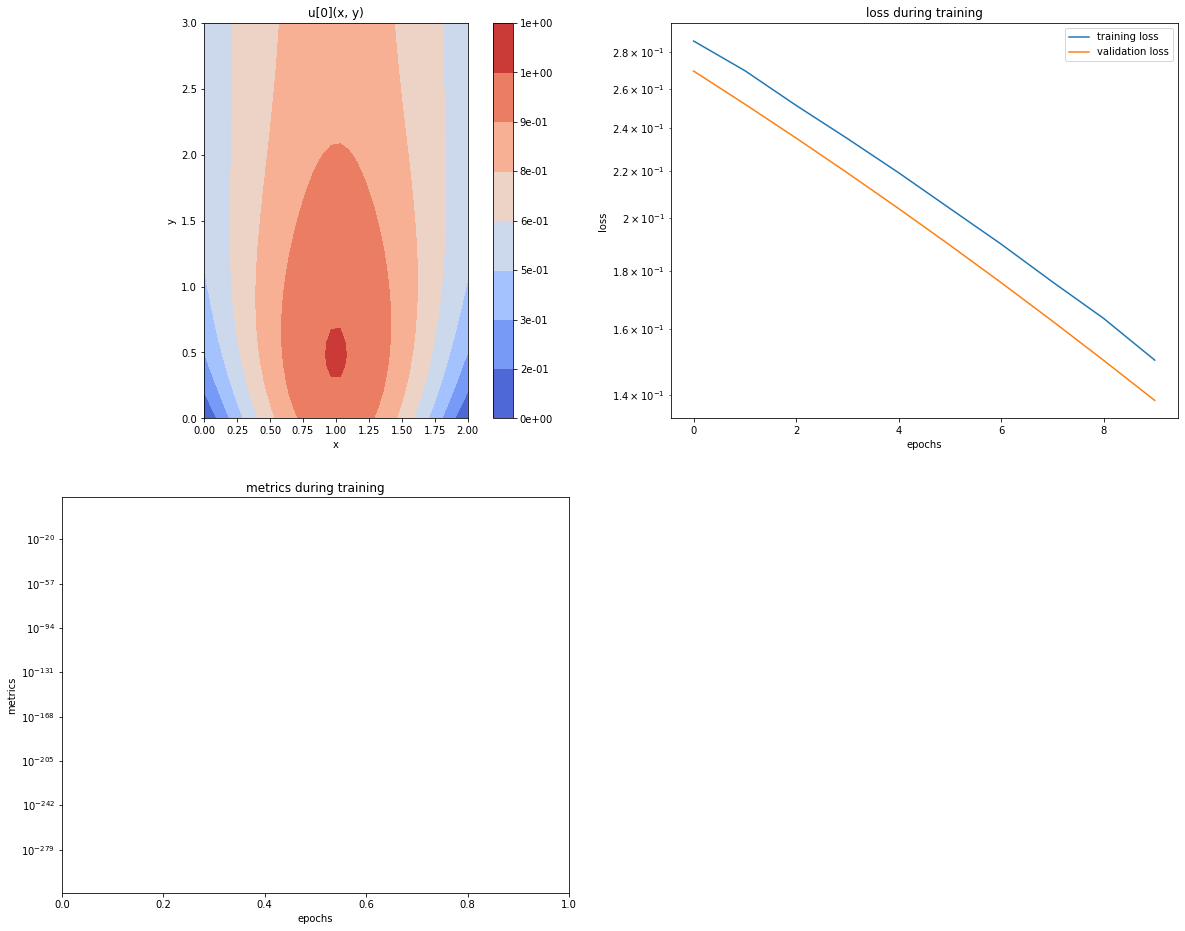

In [13]:
k, L, T = 0.3, 2, 3

heat = lambda u, x, t: [
    diff(u, t) - k * diff(u, x, order=2)
]

conditions = [
    IBVP1D(
        t_min=0, t_min_val=lambda x: torch.sin(np.pi * x / L),
        x_min=0, x_min_prime=lambda t:  np.pi/L * torch.exp(-k*np.pi**2*t/L**2),
        x_max=L, x_max_prime=lambda t: -np.pi/L * torch.exp(-k*np.pi**2*t/L**2)
    )
]


nets = [
    FCNN(n_input_units=2, hidden_units=(32, 32))
]

monitor=Monitor2D(check_every=10, xy_min=(0, 0), xy_max=(L, T))
monitor_callback = MonitorCallback(monitor)


solver = Solver2D(
    pde_system=heat,
    conditions=conditions,
    xy_min=(0, 0),  
    xy_max=(L, T), 
    nets=nets,
    train_generator=Generator2D((32, 32), (0, 0), (L, T), method='equally-spaced-noisy'),
    valid_generator=Generator2D((32, 32), (0, 0), (L, T), method='equally-spaced'),
)

# Fit the neural network
solver.fit(max_epochs=200, callbacks=[monitor_callback])

# Obtain the solution
solution_neural_net_heat = solver.get_solution()

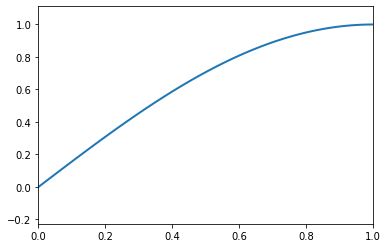

In [14]:
s = np.linspace(0, L, 101)
ts = np.linspace(0, T, 101) 
xx, tt = np.meshgrid(xs, ts)
make_animation(solution_neural_net_heat, xs, ts)

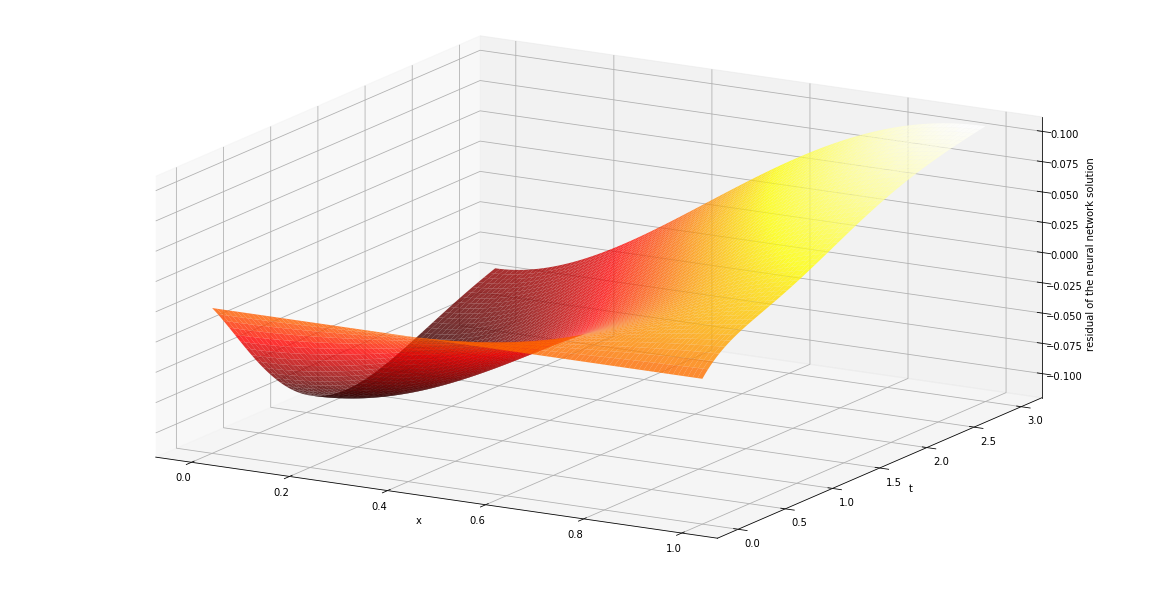

In [15]:
solution_analytical_heat = lambda x, t: np.sin(np.pi*x/L) * np.exp(-k * np.pi**2 * t / L**2)
sol_ana = solution_analytical_heat(xx, tt)
sol_net = solution_neural_net_heat(xx, tt, to_numpy=True)
plt_surf(xx, tt, sol_net-sol_ana, y_label='t', z_label='residual of the neural network solution')